# Comparison of topic models for different tokenization

Tokenization is one of the most difficult issues in text analysis of Classicall Chinese.  No ideal solution is found yet.  For this test, three ways of tokenization have been used

* document length varies, average is 250 tokens
* 80 topics
* automatic re-evaluation of alpha and eta values
* 2000 iterations with 5 passes over the corpus


## The following labels have been used:

* "mmseg": Tokenization using mmseg with a dictionary of frequently used terms of Classical Chinese (ca 3600 entries of 2 or more characters) and the character frequencies of the Kanseki Repository
* "largedic": This is also using the mmseg library, but with a very large dictionary of around 600000 words.
* "1gram": This simply uses every Chinese character as a separate token without any attempt to analyse.


## Evaluation points

1. Topic term table
2. Distribution of alpha values
3. Cooccurrence of tokens in the top 20 topic terms
4. Topics for term
5. Document by similarity


In [1]:
from IPython.core.display import display, HTML
import ktm_analysis as ktm
import numpy as np
import matplotlib.pyplot as plt
target="tokenization"
models = ktm.prepan(target)
display(HTML("<h1>1. Topic term table</h1>"))
display(HTML("<p>Topic terms of all models, arranged by descending alpha value</p>"))
display(HTML(ktm.topic_terms_table(models, html=True)))

24,0.0420,申 壬 寅 午 丙 戊 辰 庚 甲 夏,63,0.0399,節度使 遣 克用 攻 兵 撃 朱全忠 李克用 軍 加,12,0.0301,刺 仙芝 稹 盧龍 廬州 姪 横海 馬 滉 默啜
17,0.0353,則 今 此 矣 必 何 若 然 一 如,8,0.0346,兵 賊 千人 衆 城 圍 引兵 攻 數 將兵,71,0.0285,戰 撃 騎 敗 衆 餘 攻 引 破 出
65,0.0332,巳 卯 丑 癸 丁 辛 朔 乙 己 未,72,0.0337,思明 丙申 希烈 流 邠 殆盡 人 使 滉 死,15,0.0268,侍 郎 部 書 戸 尚 門 同 罷 御
18,0.0326,賊 戰 攻 衆 出 撃 敗 萬 千 進,57,0.0333,節度使 薨 兼 副 留後 ‧ 同平章事 庚戌 稹 戸部侍郎,79,0.0268,全忠 車 駕 幸 鳳翔 冬 朱全忠 温 鏐 宮
75,0.0301,河 南 東 淮 鎭 山 北 西 道 江,15,0.0324,節度使 留後 節度 貶 華州 仙芝 盧龍 司戸 昭義 領,73,0.0260,留 薨 後 南詔 丁卯 戊辰 丁巳 庚午 知 丙午
6,0.0258,平 同 章 侍 郎 加 鐸 門 充 鳳,48,0.0307,冬 幸 東都 春 丁卯 癸卯 乙酉 丙戌 己丑 乙巳,78,0.0243,城 賊 殺 守 攻 衆 士 降 門 出
55,0.0247,部 郎 侍 司 尚 戸 吏 貶 丞 兼,39,0.0305,兼 節度使 監軍 侍中 中書令 如故 檢校 代 罷 僕射,36,0.0229,今 必 國 能 我 天 彼 欲 汝 功
28,0.0245,正 春 酉 赦 改 請 和 許 辛 表,33,0.0303,刺史 全忠 表 州 鏐 錢鏐 朱全忠 詔 汴 乙亥,40,0.0227,王 行 官 議 天 令 今 等 用 制
62,0.0239,皇 后 宗 帝 廟 立 號 武 文 尊,16,0.0286,同平章事 中書侍郎 門下侍郎 翰林學士 兵部侍郎 竝 軍使 壬申 尚書 式,1,0.0222,平 章 同 加 兼 相 閣 支 晏 庚申
57,0.0228,忠 稹 嶽 梁 牙 夫 張 厚 請 信,45,0.0286,臣 陛下 今 天下 以爲 欲 安 必 言 不可,42,0.0218,攻 河陽 刺 淮西 徐州 守 拔 宣武 魏博 朱全忠
2,0.0220,卿 朕 陛 對 何 此 法 故 非 古,10,0.0279,駢 節度使 招討使 中尉 將兵 徐州 神策 鳳翔 都將 討,51,0.0215,都 討 副 牙 營 行 招 督 統 護


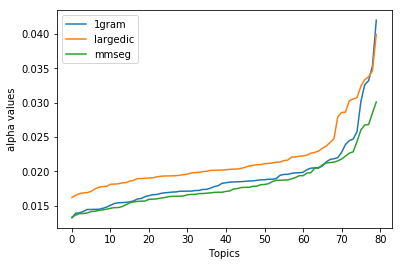

In [2]:
display(HTML("<h1>2. Distribution of alpha values</h1>"))
for m in models:
    lda=m[0]
    alpha=np.sort(lda.alpha)
    plt.plot(alpha)
plt.ylabel('alpha values')
plt.xlabel('Topics')
plt.legend([m[5] for m in models], loc='upper left')
plt.show()

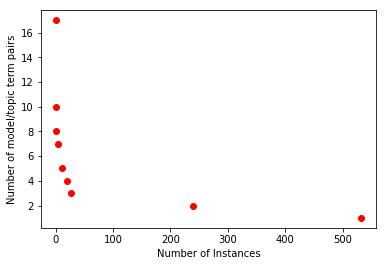

In [3]:
num_words = 20
display(HTML("<h1>3. Cooccurrence of tokens in the top %d topic terms</h1>" % (num_words)))
co=ktm.tab_co_list(ktm.get_tt_co(models, num_words=num_words))
plt.plot(co[1], co[0], 'ro')
plt.ylabel('Number of model/topic term pairs')
plt.xlabel('Number of Instances')
plt.show()

In [4]:
term= u"平"
display(HTML("<h1>4. Topics for term %s</h1>" % (term)))
ktm.topics_for_term(models, term)

[('1gram',
  [(6, 0.16455735482333456),
   (43, 0.015127746674523148),
   (59, 0.010110216035504138),
   (75, 0.011557421460138878)]),
 ('largedic', []),
 ('mmseg', [(1, 0.19439728152373406)])]

In [5]:
res=ktm.get_simdocs(models, 3)
display(HTML("<h1>5. Document by similarity</h1>"))
display(HTML("<p>%s</p>" % ("<p>\n".join(ktm.print_simdocs(res, html=True)))))